# PROCESSING X_TEST

# Loading the dataframe

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utils import *

In [2]:
X_train = pd.read_csv('../X_train_Hi5.csv')
X_test = pd.read_csv('../X_test_Hi5.csv')

/tmp/ipykernel_23040/530144225.py:1: DtypeWarning: Columns (108,110,111,115,117,118,122,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  X_train = pd.read_csv('../X_train_Hi5.csv')


## Selection of the features

In [3]:
var = "piezo_groundwater_level_category"

# We firstly consider the features that we selected to predict var
row_features = ['piezo_measurement_date', 'piezo_station_latitude', 'piezo_station_longitude', 'piezo_station_altitude', 'piezo_station_investigation_depth', 'meteo_time_tx', 'meteo_temperature_avg', 'meteo_amplitude_tn_tx', 'meteo_evapotranspiration_grid', 'hydro_observation_result_elab', 'prelev_other_volume_sum']

df = X_test[row_features]

In [4]:
# Apply the function days_since_start_of_2020 to the 'piezo_measurement_date' column
df.loc[:, 'days_since_2020'] = df['piezo_measurement_date'].apply(days_since_start_of_2020)

# We replace 'piezo_measurement_date' by 'days_since_2020'
features = ['days_since_2020', 'piezo_station_latitude', 'piezo_station_longitude', 'piezo_station_altitude', 'piezo_station_investigation_depth', 'meteo_time_tx', 'meteo_temperature_avg', 'meteo_amplitude_tn_tx', 'meteo_evapotranspiration_grid', 'hydro_observation_result_elab', 'prelev_other_volume_sum']

/tmp/ipykernel_23040/4231109069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'days_since_2020'] = df['piezo_measurement_date'].apply(days_since_start_of_2020)


# Analyse

### Overview

In [5]:
print(df.head())

  piezo_measurement_date  piezo_station_latitude  piezo_station_longitude  \
0             2022-06-01               45.828148                 5.748241   
1             2022-06-01               46.028102                 5.356637   
2             2022-06-01               45.895734                 5.220795   
3             2022-06-01               46.201180                 5.948977   
4             2022-06-01               46.136402                 5.313353   

   piezo_station_altitude  piezo_station_investigation_depth  meteo_time_tx  \
0                  232.00                              20.00         1556.0   
1                  247.25                              35.60         1716.0   
2                  218.77                              35.22         1506.0   
3                  499.85                              34.20         1625.0   
4                  260.00                              37.30         1726.0   

   meteo_temperature_avg  meteo_amplitude_tn_tx  \
0          

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611208 entries, 0 to 611207
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   piezo_measurement_date             611208 non-null  object 
 1   piezo_station_latitude             611208 non-null  float64
 2   piezo_station_longitude            611208 non-null  float64
 3   piezo_station_altitude             611208 non-null  float64
 4   piezo_station_investigation_depth  611208 non-null  float64
 5   meteo_time_tx                      611208 non-null  float64
 6   meteo_temperature_avg              611208 non-null  float64
 7   meteo_amplitude_tn_tx              611208 non-null  float64
 8   meteo_evapotranspiration_grid      611208 non-null  float64
 9   hydro_observation_result_elab      611208 non-null  float64
 10  prelev_other_volume_sum            611208 non-null  float64
 11  days_since_2020                    6112

In [7]:
df.describe()

,piezo_station_latitude,piezo_station_longitude,piezo_station_altitude,piezo_station_investigation_depth,meteo_time_tx,meteo_temperature_avg,meteo_amplitude_tn_tx,meteo_evapotranspiration_grid,hydro_observation_result_elab,prelev_other_volume_sum,days_since_2020
count,611208.000000,611208.000000,611208.000000,611208.000000,611208.000000,611208.000000,611208.000000,611208.000000,6.112080e+05,6.112080e+05,611208.000000
mean,46.382918,2.191367,146.468334,82.755617,1397.620576,20.738662,12.728440,4.791764,1.443601e+04,1.971052e+07,1123.177008
std,2.173051,2.698975,190.889950,234.297598,162.515319,3.826916,4.461948,1.723077,7.231818e+04,7.773827e+07,185.844633
min,41.399732,-4.657129,-999.000000,0.000000,0.000000,-2.300000,0.800000,0.200000,-1.369000e+04,0.000000e+00,882.000000
25%,44.472234,-0.112823,40.000000,17.600000,1320.000000,18.400000,9.400000,3.600000,1.020000e+02,1.040360e+07,942.000000
50%,46.305138,1.901276,107.000000,38.350000,1424.000000,20.700000,12.600000,4.700000,4.880000e+02,1.059127e+07,1002.000000
75%,48.186733,4.123897,185.000000,76.000000,1514.000000,23.200000,15.900000,5.800000,2.884000e+03,1.074784e+07,1307.000000
max,50.971087,9.519890,2150.000000,5233.400000,2359.000000,33.800000,31.500000,9.000000,1.738213e+06,2.680132e+09,1368.000000


### NaN situation in X_test

In [8]:
df.isnull().sum()

piezo_measurement_date               0
piezo_station_latitude               0
piezo_station_longitude              0
piezo_station_altitude               0
piezo_station_investigation_depth    0
meteo_time_tx                        0
meteo_temperature_avg                0
meteo_amplitude_tn_tx                0
meteo_evapotranspiration_grid        0
hydro_observation_result_elab        0
prelev_other_volume_sum              0
days_since_2020                      0
dtype: int64

We can see that, for almost 1 measure out of 2, 'prelev_other_volume_sum' is NaN, implies that it will hard to consider this feature as a interesting prediction feature.           

In [9]:
features.remove('prelev_other_volume_sum')

## Visualization

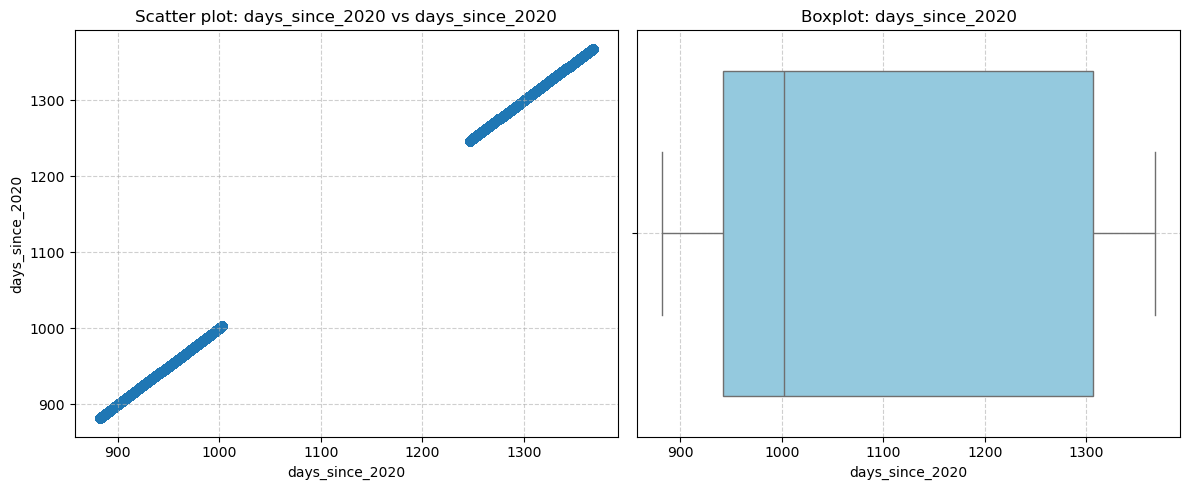

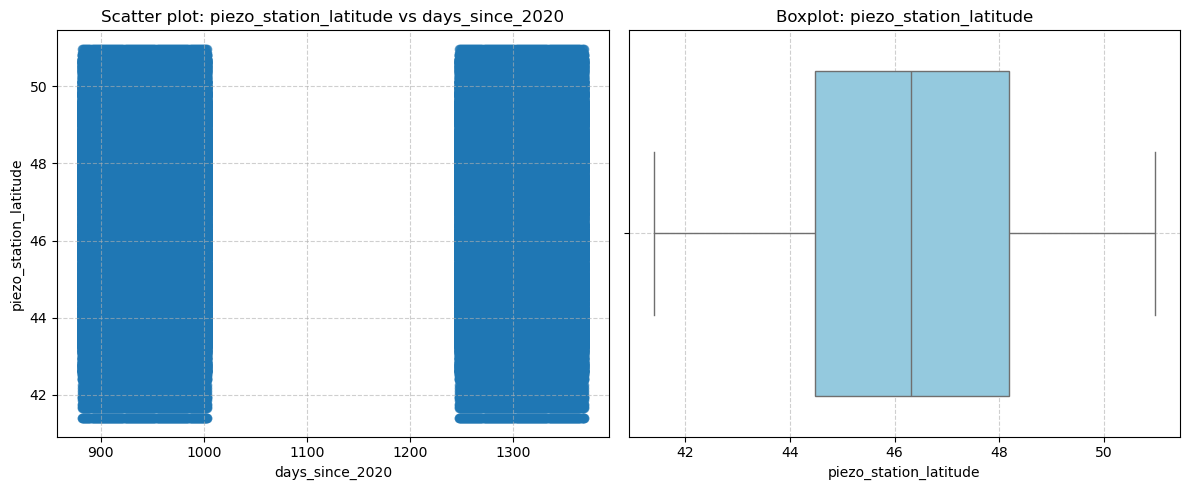

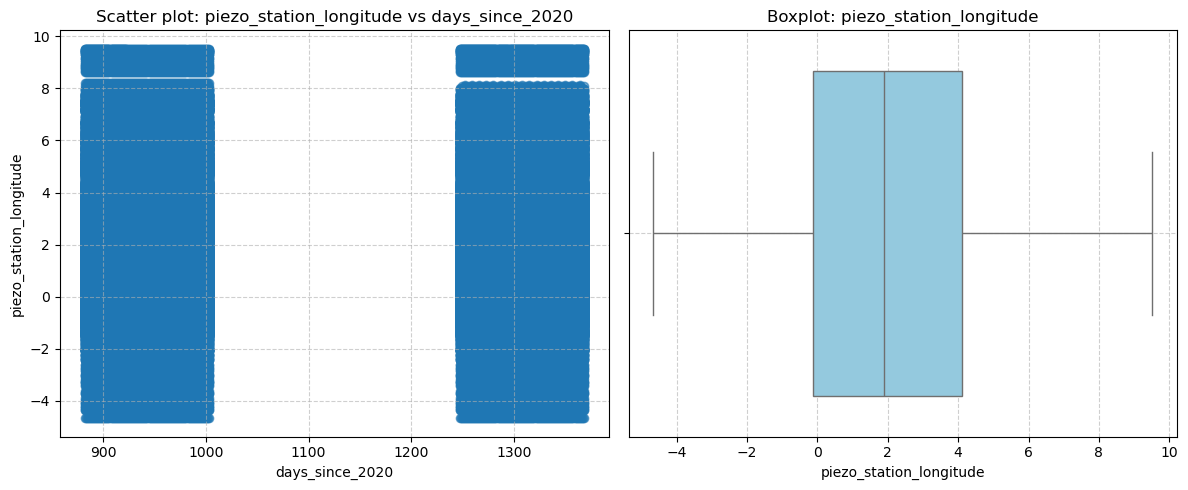

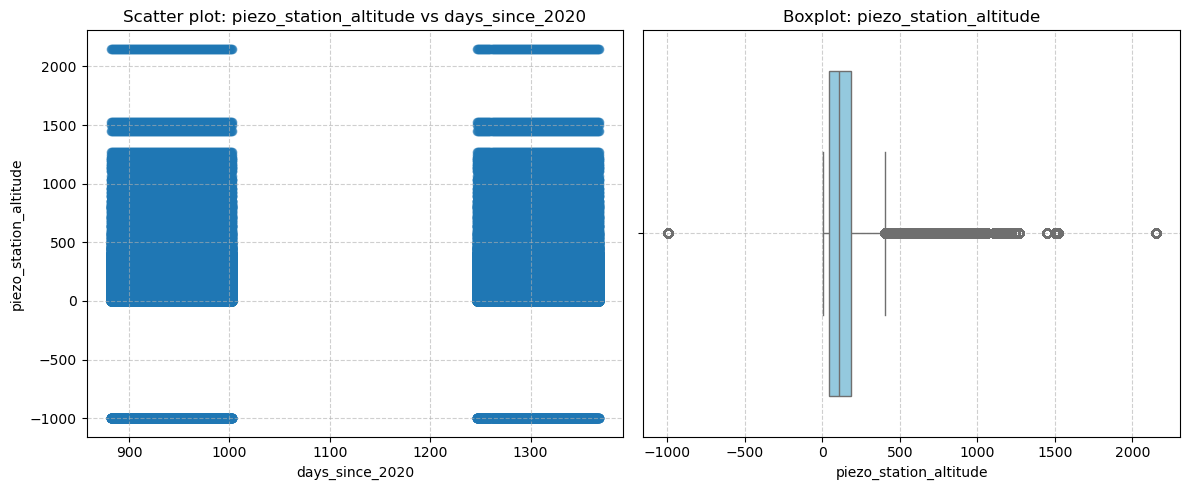

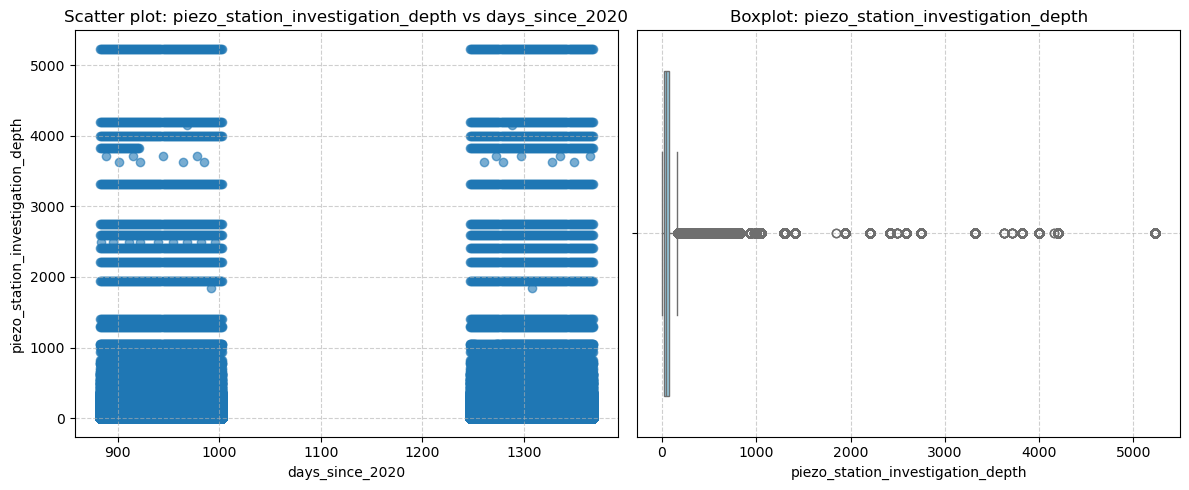

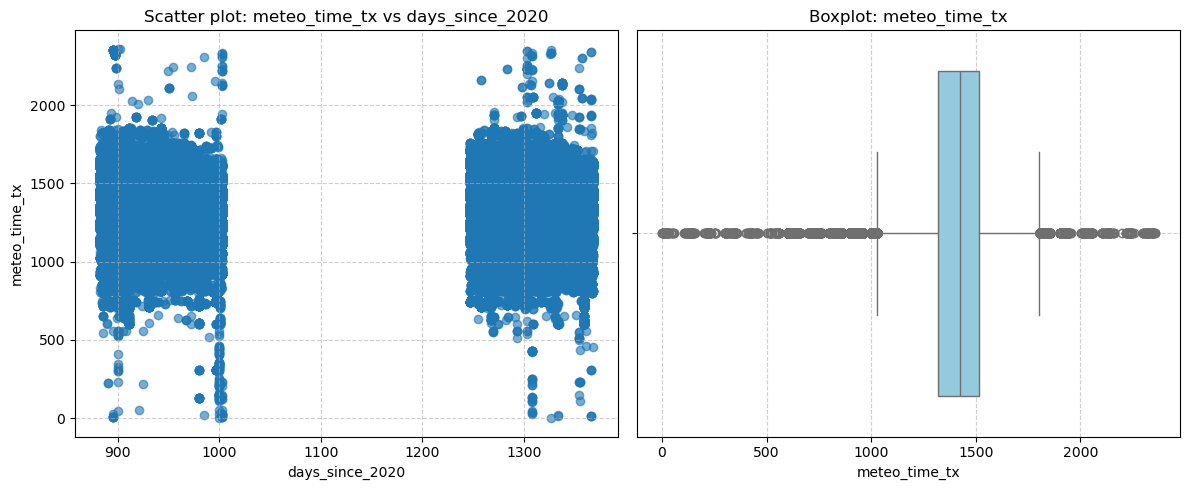

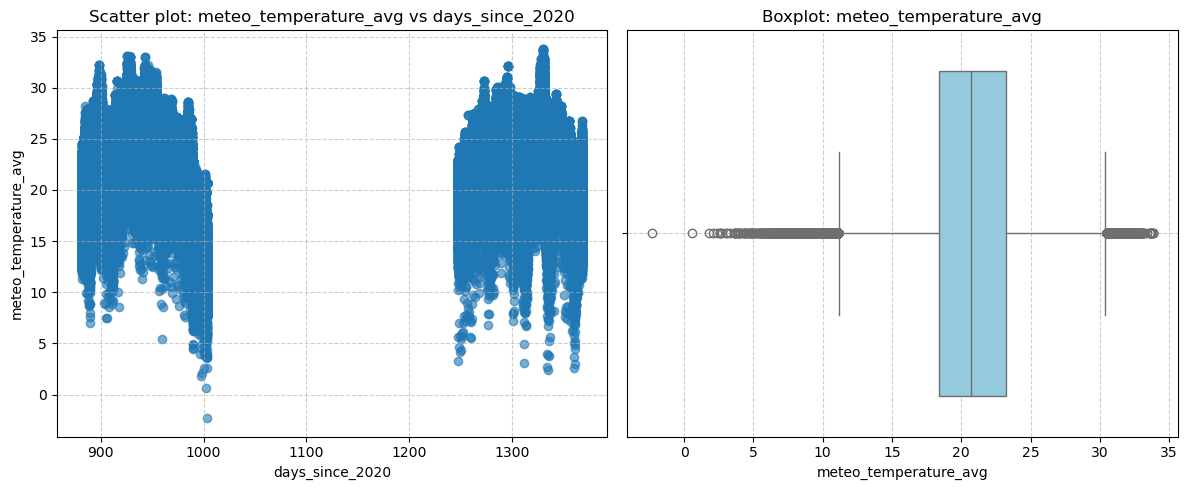

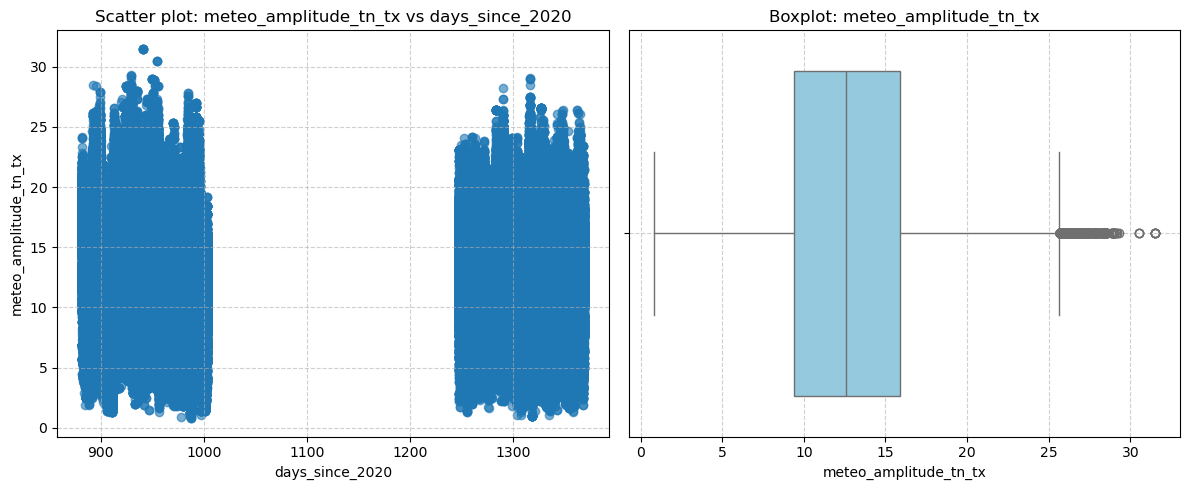

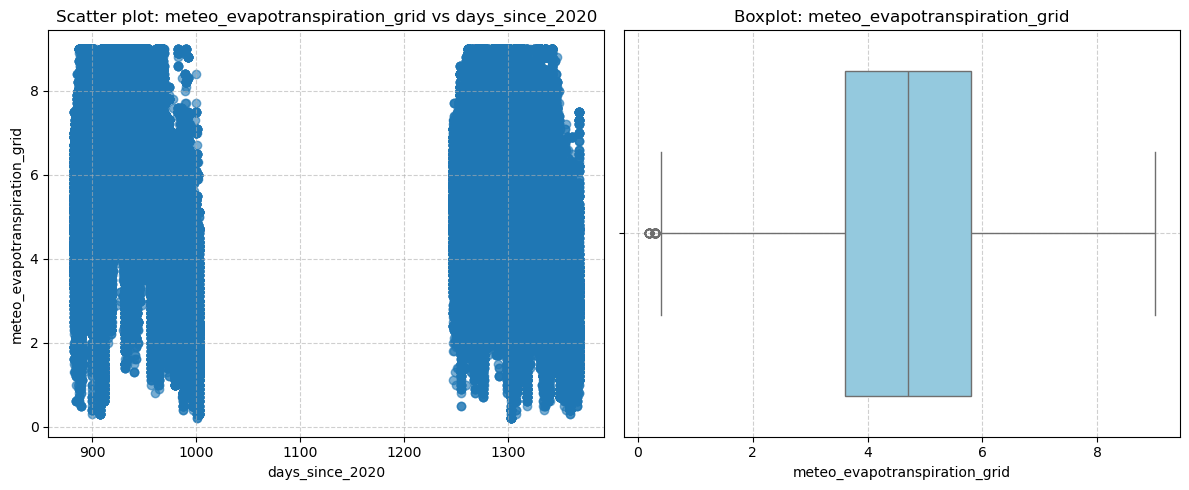

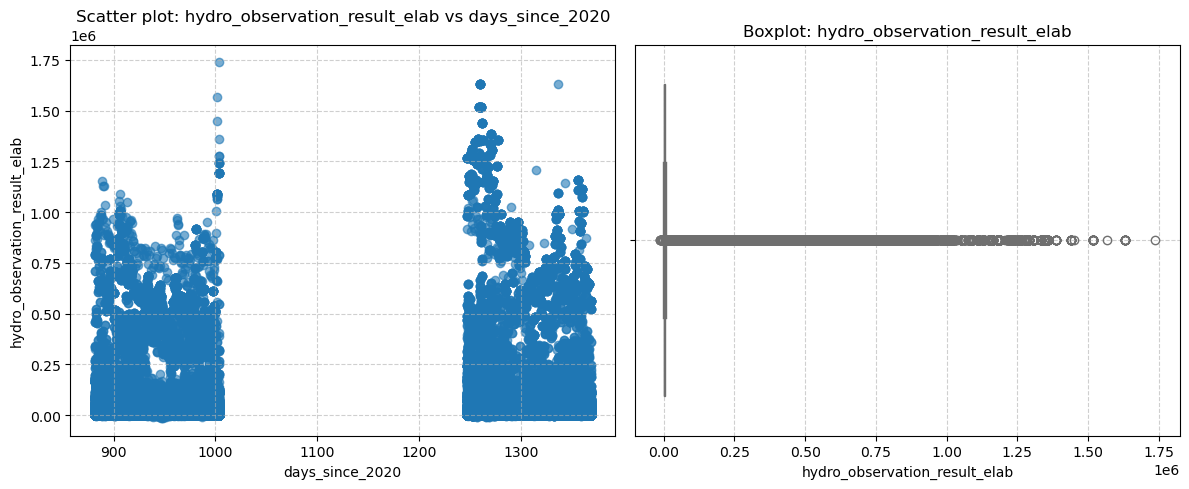

In [10]:
for var in features:
    plt.figure(figsize=(12, 5))  # Taille de la figure pour éviter l'écrasement des graphiques
    
    # Scatter plot
    plt.subplot(1, 2, 1)  # Position du premier subplot
    plt.scatter(df['days_since_2020'], df[var], alpha=0.6)
    plt.title(f"Scatter plot: {var} vs days_since_2020", fontsize=12)
    plt.xlabel('days_since_2020')
    plt.ylabel(var)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Box plot
    plt.subplot(1, 2, 2)  # Position du deuxième subplot
    sns.boxplot(x=df[var], color='skyblue')
    plt.title(f"Boxplot: {var}", fontsize=12)
    plt.xlabel(var)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()  # Pour éviter que les éléments se chevauchent
    plt.show()


We can see that X_test only contains values from summer

# Data cleaning

Cleaning the data will focus on filling NaN values rather than altering variable values because NaNs prevent the model from working properly, while outliers might still hold valuable information. Filling NaNs ensures the dataset is usable without distorting its integrity.

We begin with a selection of the missing values we will have to clean

In [11]:
missing_columns = df.columns[df.isna().sum() > 0].tolist()

We fill NaN with the median

In [12]:
for var in missing_columns:
    column_filler(df, var, 'median')

Verification 

In [13]:
df.isnull().sum()

piezo_measurement_date               0
piezo_station_latitude               0
piezo_station_longitude              0
piezo_station_altitude               0
piezo_station_investigation_depth    0
meteo_time_tx                        0
meteo_temperature_avg                0
meteo_amplitude_tn_tx                0
meteo_evapotranspiration_grid        0
hydro_observation_result_elab        0
prelev_other_volume_sum              0
days_since_2020                      0
dtype: int64

In [19]:
df_clean = df[features]

# Sauvegarde

In [20]:
df_clean.to_csv('../X_test_Hi5.csv')